<a href="https://colab.research.google.com/github/NaveenDivakar/Sentiment-Analysis-and-Product-Recommdation/blob/main/Product_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("allphone.csv")

# Display the DataFrame
print(df)

                                      product_name  \
0   CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
1   CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
2   CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
3   CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
4   CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
..                                             ...   
85  CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
86  CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
87  CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
88  CMF by Nothing Phone 1 (Black, 128 GB) Reviews   
89  CMF by Nothing Phone 1 (Black, 128 GB) Reviews   

                                               review  rating  
0   The phone is very awesome all the interface/ui...       4  
1   Excellent mobile super undi aa price ki chala ...       5  
2   Okay don't know why some people saying camera ...       5  
3   The product is good.\nThe back cover need to b...       4  
4      Performance camera quali

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  90 non-null     object
 1   review        90 non-null     object
 2   rating        90 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [ ]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the required resource

def clean_nic_name(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the cleaning function to the NIC Name column
df['cleaned_review'] = df['review'].apply(clean_nic_name)

# Display the original and cleaned columns
print(df[['review', 'cleaned_review']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                               review  \
0   The phone is very awesome all the interface/ui...   
1   Excellent mobile super undi aa price ki chala ...   
2   Okay don't know why some people saying camera ...   
3   The product is good.\nThe back cover need to b...   
4      Performance camera quality battery very good 👍   
..                                                ...   
85  CMF by Nothing Phone 1 is an excellent Smartph...   
86  Great product for the audience for basic regul...   
87  first impression looks good, phone is clean, n...   
88                                 Everything is good   
89  This phone is best compared to similar. It's j...   

                                       cleaned_review  
0   phone awesom interfaceui good overal camera al...  
1   excel mobil super undi aa price ki chala batte...  
2   okay dont know peopl say camera good must say ...  
3   product good back cover need metal sim tray qu...  
4               perform camera qual

In [ ]:
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set the NLTK data path to the base directory
nltk.data.path.append('C:\\vscode\\nltk_data')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('allphone.csv')

# Ensure the 'review' column exists
if 'review' not in df.columns:
    print("Error: 'review' column not found in the dataset!")
else:
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))

    # Function to clean the review text
    def clean_text(review):
        # Remove emojis using regex
        review = re.sub(r'[^\w\s,]', '', review)  # Remove punctuation
        review = re.sub(r'http\S+', '', review)  # Remove URLs if any
        review = re.sub(r'[\U00010000-\U0010ffff]', '', review)  # Remove emojis (Unicode range)

        # Tokenize the review into words
        words = word_tokenize(review.lower())  # Lowercasing the text to standardize it
        # Remove stopwords and punctuation
        cleaned_words = [word for word in words if word not in stop_words and word not in string.punctuation]
        # Rejoin words back into a single string
        return ' '.join(cleaned_words)

    # Apply the cleaning function to the 'review' column
    df['cleaned_review'] = df['review'].apply(clean_text)

    # Save the cleaned DataFrame to a new CSV file
    df.to_csv('cleaned_mobilereviews_no_emojis.csv', index=False)

    # Display the first few rows to verify
    print(df[['review', 'cleaned_review']].head())

                                              review  \
0  The phone is very awesome all the interface/ui...   
1  Excellent mobile super undi aa price ki chala ...   
2  Okay don't know why some people saying camera ...   
3  The product is good.\nThe back cover need to b...   
4     Performance camera quality battery very good 👍   

                                      cleaned_review  
0  phone awesome interfaceui good overall camera ...  
1  excellent mobile super undi aa price ki chala ...  
2  okay dont know people saying camera good must ...  
3  product good back cover need metallic sim tray...  
4            performance camera quality battery good  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [ ]:
df

,product_name,review,rating,cleaned_review
0,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",The phone is very awesome all the interface/ui...,4,phone awesome interfaceui good overall camera ...
1,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Excellent mobile super undi aa price ki chala ...,5,excellent mobile super undi aa price ki chala ...
2,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Okay don't know why some people saying camera ...,5,okay dont know people saying camera good must ...
3,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",The product is good.\nThe back cover need to b...,4,product good back cover need metallic sim tray...
4,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Performance camera quality battery very good 👍,5,performance camera quality battery good
5,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Really impressive mobile is good camera is goo...,5,really impressive mobile good camera good batt...
6,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Camera is ok but there is noise at night but v...,5,camera ok noise night video stabilizer awesome...
7,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Features fine as per value.\nCamera 3/5\nDispl...,5,features fine per value camera 35 display 55 b...
8,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Love the design and best performing OS in this...,5,love design best performing os segment
9,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",Value for money.,4,value money


In [ ]:
import pandas as pd

if 'review' in df.columns:
    # Drop the 'review' column
    df = df.drop(columns=['review'])

    # Save the modified DataFrame to a new CSV file
    df.to_csv('cleaned_mobilereviews_no_review.csv', index=False)



In [ ]:
df

,product_name,rating,cleaned_review
0,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",4,phone awesome interfaceui good overall camera ...
1,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,excellent mobile super undi aa price ki chala ...
2,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,okay dont know people saying camera good must ...
3,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",4,product good back cover need metallic sim tray...
4,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,performance camera quality battery good
5,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,really impressive mobile good camera good batt...
6,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,camera ok noise night video stabilizer awesome...
7,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,features fine per value camera 35 display 55 b...
8,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",5,love design best performing os segment
9,"CMF by Nothing Phone 1 (Black, 128 GB) Reviews",4,value money


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the data
# Provide the full path to your CSV file if it's not in the same directory
# Replace '/path/to/your/file/' with the actual directory containing the file
file_path = '/path/to/your/file/cleaned_mobilereviews_no_review.csv'  # Update with the correct path

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and try again.")
    # You can optionally exit the script here if the file is crucial for further processing:
    # import sys
    # sys.exit(1)  # Exit with an error code

# Function to get sentiment
def get_sentiment(cleaned_review):
    analysis = TextBlob(cleaned_review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the review column
df['Sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Save the updated DataFrame to a new CSV file
# You might want to specify a path here as well
df.to_csv('sentiment.csv', index=False)

# Display the first few rows to verify
print(df[['cleaned_review', 'Sentiment']].head())

Error: File not found at /path/to/your/file/cleaned_mobilereviews_no_review.csv. Please check the path and try again.
                                      cleaned_review Sentiment
0  phone awesome interfaceui good overall camera ...  Positive
1  excellent mobile super undi aa price ki chala ...  Positive
2  okay dont know people saying camera good must ...  Positive
3  product good back cover need metallic sim tray...  Positive
4            performance camera quality battery good  Positive


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sentiment.csv')

# Define the sentiment score mapping
sentiment_scores = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Map the Sentiment column to sentiment scores
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_scores)

# Display the first few rows to verify
print(df.head())

# Optionally, save the updated DataFrame to a new CSV
df.to_csv('sentimentscore.csv', index=False)

                                     product_name  rating  \
0  CMF by Nothing Phone 1 (Black, 128 GB) Reviews       4   
1  CMF by Nothing Phone 1 (Black, 128 GB) Reviews       5   
2  CMF by Nothing Phone 1 (Black, 128 GB) Reviews       5   
3  CMF by Nothing Phone 1 (Black, 128 GB) Reviews       4   
4  CMF by Nothing Phone 1 (Black, 128 GB) Reviews       5   

                                      cleaned_review Sentiment  \
0  phone awesome interfaceui good overall camera ...  Positive   
1  excellent mobile super undi aa price ki chala ...  Positive   
2  okay dont know people saying camera good must ...  Positive   
3  product good back cover need metallic sim tray...  Positive   
4            performance camera quality battery good  Positive   

   Sentiment_Score  
0                1  
1                1  
2                1  
3                1  
4                1  


<ipython-input-11-99e6efe74a11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


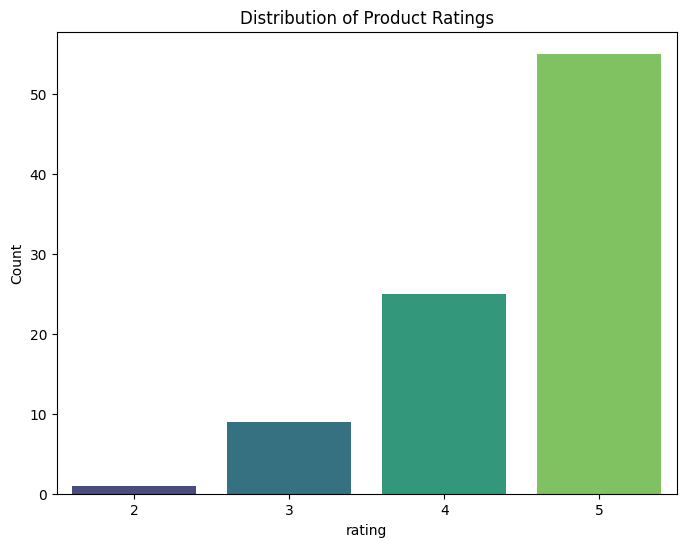

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Rating' is a column in the DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

<ipython-input-12-e8a699d303eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Score', data=df, palette='coolwarm')


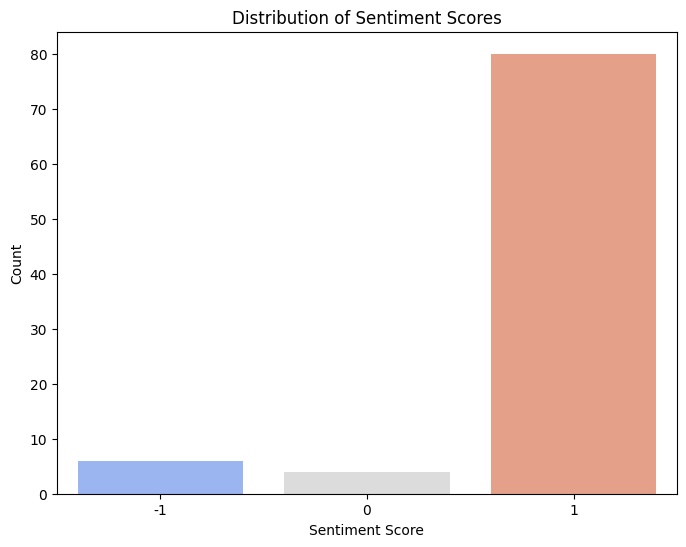

In [ ]:
# Assuming 'Sentiment_Score' is the column with mapped scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Score', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

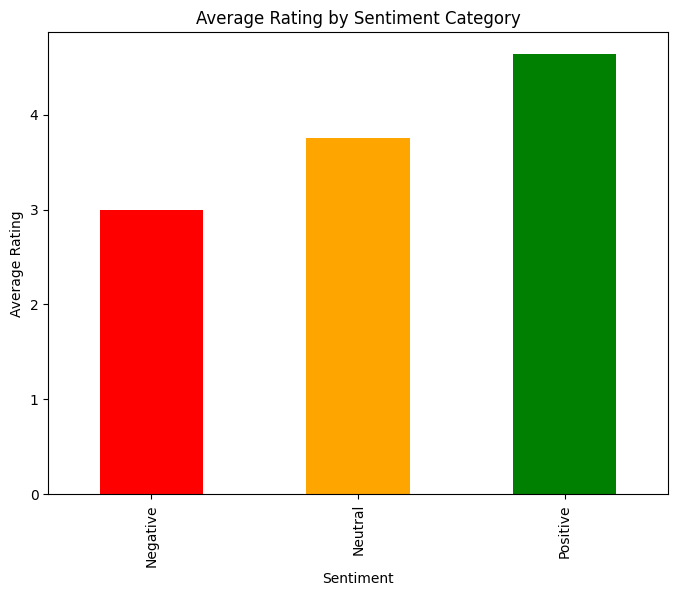

In [ ]:
# Calculate the average rating for each sentiment category
avg_rating_by_sentiment = df.groupby('Sentiment')['rating'].mean()

# Plot the average ratings by sentiment
plt.figure(figsize=(8, 6))
avg_rating_by_sentiment.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

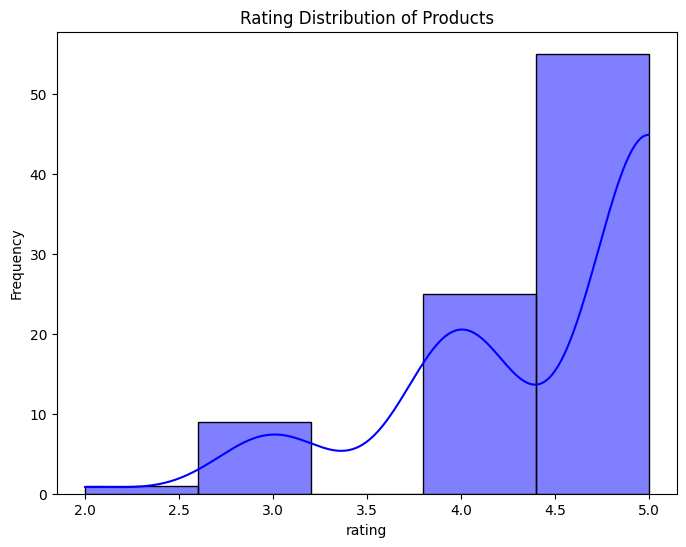

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution of Products')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

                                     product_name Sentiment
0  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
1  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
2  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
3  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
4  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive


<ipython-input-15-988d341353dd>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Positive', color='green', label='Positive', ci=None)
<ipython-input-15-988d341353dd>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Negative', color='red', label='Negative', ci=None, bottom=sentiment_pivot['Positive'])
<ipython-input-15-988d341353dd>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Neutral', color='gray', label='Neutral', ci=None, bottom=sentiment_pivot['Positive']+sentiment_pivot['Negative'])


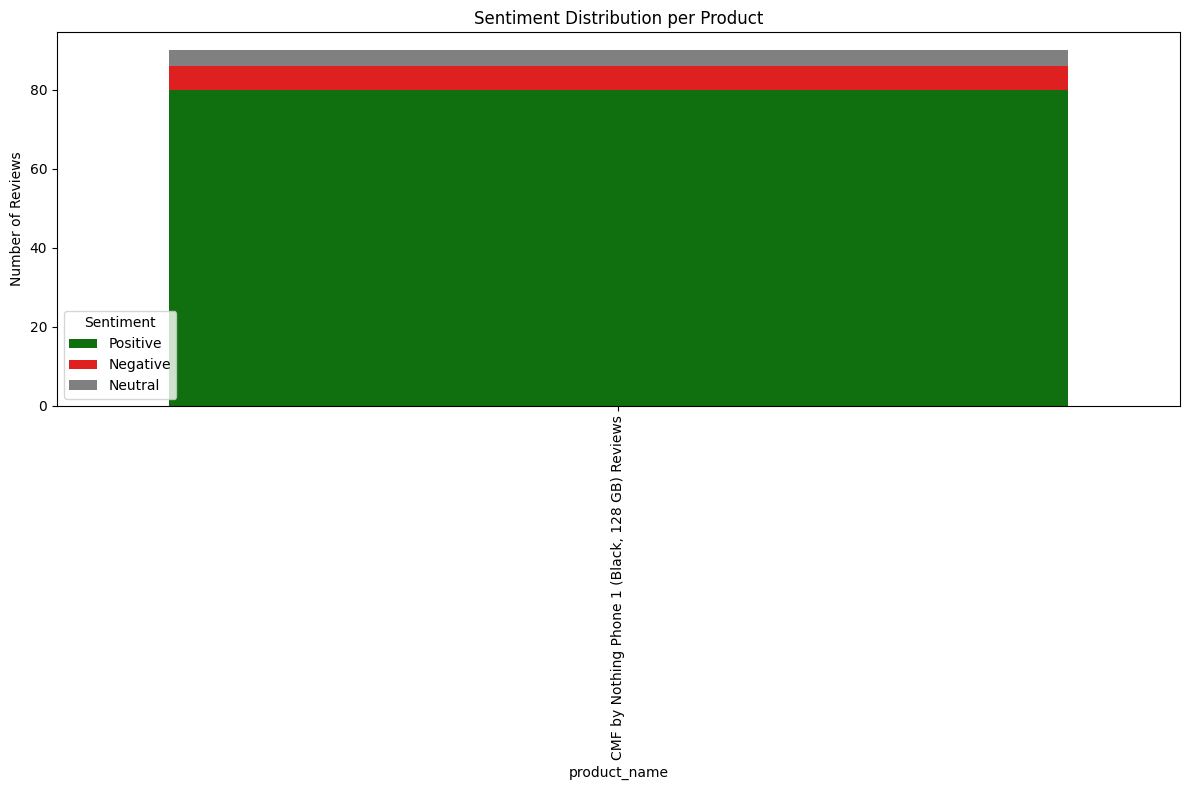

Top product with most positive reviews: CMF by Nothing Phone 1 (Black, 128 GB) Reviews (80 Positive reviews)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure this path is correct)
df = pd.read_csv('sentimentscore.csv')

# Check the first few rows to make sure sentiment is calculated
print(df[['product_name', 'Sentiment']].head())

# Group by product and sentiment, and count the occurrences of each sentiment
sentiment_counts = df.groupby(['product_name', 'Sentiment']).size().reset_index(name='count')

# Pivot the table to make it easier to plot
sentiment_pivot = sentiment_counts.pivot(index='product_name', columns='Sentiment', values='count').fillna(0)

# Plot the sentiment distribution for each product
plt.figure(figsize=(12, 8))
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Positive', color='green', label='Positive', ci=None)
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Negative', color='red', label='Negative', ci=None, bottom=sentiment_pivot['Positive'])
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Neutral', color='gray', label='Neutral', ci=None, bottom=sentiment_pivot['Positive']+sentiment_pivot['Negative'])

# Add labels and title
plt.title('Sentiment Distribution per Product')
plt.xlabel('product_name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  # Rotate product names to make them readable
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

# Get the product with the highest number of positive reviews
top_product = sentiment_pivot['Positive'].idxmax()
top_product_positive_count = sentiment_pivot['Positive'].max()

# Display the top product with the most positive reviews
print(f"Top product with most positive reviews: {top_product} ({top_product_positive_count} Positive reviews)")

                                     product_name Sentiment
0  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
1  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
2  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
3  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive
4  CMF by Nothing Phone 1 (Black, 128 GB) Reviews  Positive


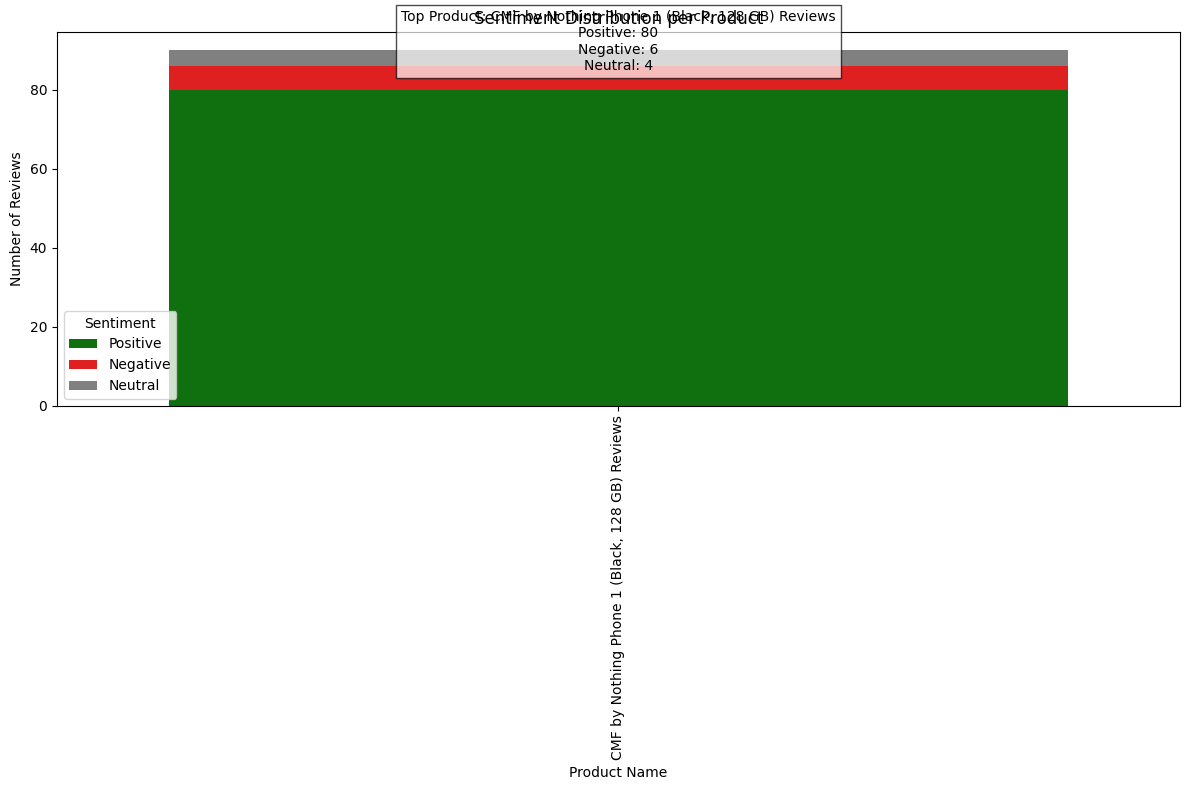

Top product with most positive reviews: CMF by Nothing Phone 1 (Black, 128 GB) Reviews (80 Positive reviews)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure this path is correct)
df = pd.read_csv('sentimentscore.csv')

# Check the first few rows to make sure sentiment is calculated
print(df[['product_name', 'Sentiment']].head())

# Group by product and sentiment, and count the occurrences of each sentiment
sentiment_counts = df.groupby(['product_name', 'Sentiment']).size().reset_index(name='count')

# Pivot the table to make it easier to plot
sentiment_pivot = sentiment_counts.pivot(index='product_name', columns='Sentiment', values='count').fillna(0)

# Plot the sentiment distribution for each product
plt.figure(figsize=(12, 8))

# Plot the stacked bar plot as before
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Positive', color='green', label='Positive', errorbar=None)
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Negative', color='red', label='Negative', errorbar=None, bottom=sentiment_pivot['Positive'])
sns.barplot(data=sentiment_pivot.reset_index(), x='product_name', y='Neutral', color='gray', label='Neutral', errorbar=None, bottom=sentiment_pivot['Positive']+sentiment_pivot['Negative'])

# Get the product with the highest number of positive reviews
reset_df = sentiment_pivot.reset_index()  # Convert index to column
top_product_index = reset_df['Positive'].idxmax()  # Find the index of the top product

# Get the top product name and sentiment counts
top_product_name = reset_df.loc[top_product_index, 'product_name']
top_product_positive_count = reset_df.loc[top_product_index, 'Positive']
top_product_negative_count = reset_df.loc[top_product_index, 'Negative']
top_product_neutral_count = reset_df.loc[top_product_index, 'Neutral']

# Add labels and title
plt.title('Sentiment Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  # Rotate product names to make them readable
plt.legend(title='Sentiment')

# Annotate the top product with detailed information
# Position the annotation slightly above the positive bar for the top product
top_product_x_position = reset_df.loc[top_product_index, 'product_name']

# Annotating the top product (highlighting the bar)
plt.text(x=top_product_x_position,
         y=reset_df.loc[top_product_index, 'Positive'] + 5,  # Adjust Y position to be above the bar
         s=f"Top Product: {top_product_name}\nPositive: {top_product_positive_count}\nNegative: {top_product_negative_count}\nNeutral: {top_product_neutral_count}",
         color='black', ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()

# Show the plot
plt.show()

# Display the top product with the most positive reviews
print(f"Top product with most positive reviews: {top_product_name} ({top_product_positive_count} Positive reviews)")